In [1]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 9.5 MB/s eta 0:00:16
   - -------------------------------------- 3.9/150.0 MB 10.7 MB/s eta 0:00:14
   - -------------------------------------- 5.0/150.0 MB 8.9 MB/s eta 0:00:17
   - -------------------------------------- 5.5/150.0 MB 7.6 MB/s eta 0:00:19
   - -------------------------------------- 5.8/150.0 MB 6.6 MB/s eta 0:00:22
   - -------------------------------------- 6.0/150.0 MB 5.2 MB/s eta 0:00:28
   - -------------------------------------- 6.0/150.0 MB 5.2 MB/s eta 0:00:28
   - -------------------------------------- 6.3/150.0 MB 4.1 MB/s eta 0:00:36
   - -------------------------------------- 6.3/150.0 MB 4.1 MB/s eta 0:00:36
   - -------

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

In [7]:
df = pd.read_csv("diabetess.csv")
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [11]:
X = df.drop("class", axis=1)
Y = df["class"]
X_train,X_test,Y_train,Y_test = train_test_split(X, Y,test_size = 0.2,random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled)
print("------------------------------------")
print(X_test_scaled)

[[-0.52639686 -1.15139792 -3.75268255 ... -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 ... -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  ... -0.42452187  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.62029661  0.89659009 ...  1.76054443  1.981245
   0.44308379]
 [-1.13052335  0.62935353 -3.75268255 ...  1.34680407 -0.78487662
  -0.33992901]
 [-1.13052335  0.12949347  1.43720319 ... -1.22614383 -0.61552223
  -1.03594038]]
------------------------------------
[[ 0.68185612 -0.71402038 -0.61712658 ...  0.26073561 -0.11637247
   0.87809089]
 [-0.52639686 -0.27664283  0.30191569 ...  0.48053518 -0.954231
  -1.03594038]
 [-0.52639686 -0.40160784 -0.29275872 ... -0.15300476 -0.9245197
  -1.03594038]
 ...
 [ 1.28598261 -0.80774414  0.13973176 ...  0.62275843  0.04703966
   2.0961108 ]
 [-0.52639686  0.78555979  0.03160914 ... -0.51502758 -0.39268751
  -0.33992901]
 [ 1.28598261 -1.46381046  0.03160914 ...  0.42881763  0.70068816


In [20]:
xgb = XGBClassifier(use_label_encoder= False, eval_metric="logloss",random_state=42)
param_grid={
    'n_estimators':[100, 150, 200, 300],
    'learning_rate': [0.01,0.1,0.15],
    'max_path': [2, 3, 4, 5],
    'subexample': [0.8,1.0],
    'colsample_bytree': [0.8,1.0]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='recall',
                           cv=skf,
                           verbose=1,
                           n_jobs=-1)

In [27]:
grid_search.fit(X_train_scaled, Y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:",grid_search.best_params_)
print("Best Cross-Validated Recall:",grid_search.best_score_)

y_pred = best_model.predict(X_test_scaled)

import warnings
warnings.filterwarnings("ignore")

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_path': 2, 'n_estimators': 300, 'subexample': 0.8}
Best Cross-Validated Recall: 0.6392026578073089


In [26]:
print("\nConfusion Matrix:\n",confusion_matrix(Y_test, y_pred))
print("\nClassification Report:\n",classification_report(Y_test,y_pred))


Confusion Matrix:
 [[73 26]
 [18 37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.74      0.77        99
           1       0.59      0.67      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.72       154



In [ ]:
best_model.feagure_importances_

In [29]:
features = pd.DataFrame(best_model.feature_importances_, index = df.iloc[:,:-1].columns, columns=["Importances"])
df1 = features.sort_values(by = "Importances")
            

<Axes: xlabel='None', ylabel='Importances'>

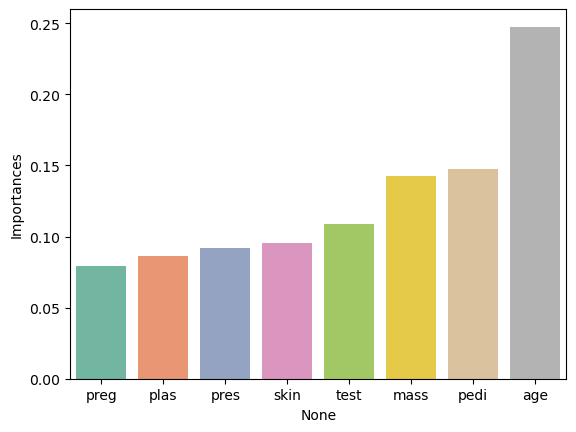

In [34]:
import seaborn as sns
sns.barplot(data = df1, x= features.index, y= "Importances", hue = features.index,palette = "Set2")